# New Section

In [ ]:
# HIDE OUTPUT
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip uninstall -y scikit-learn
!pip install -r requirements.txt
!pip install tabgan

In [26]:
import pandas as pd
import numpy as np
from tabgan.sampler import OriginalGenerator, GANGenerator
import requests
import io

url = 'https://github.com/JeffersonLab/jlab_datascience_data/blob/main/eICU_age.npy?raw=true'
response = requests.get(url)
response.raise_for_status()
data = np.load(io.BytesIO(response.content))
data = np.asarray([x[0] for x in data]).reshape(len(data),1)
data = pd.DataFrame(data)

gen_data, gen_target = GANGenerator(gen_x_times=1, bot_filter_quantile=0.001,
                                     top_filter_quantile=0.999, gan_params = {"batch_size": 500, "patience": 250, \
          "epochs" : 1000,},
                                     is_post_process=True, pregeneration_frac=2, only_generated_data=True).\
                                     generate_data_pipe(data, None, data)

Fitting CTGAN transformers for each column:   0%|          | 0/1 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/1000 [00:00<?, ?it/s]

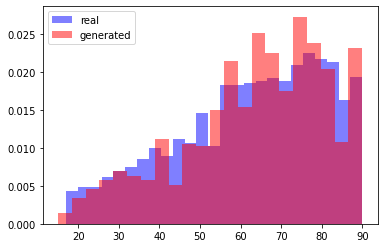

In [27]:
import matplotlib.pyplot as plt
plt.hist(gen_data.T, color='blue', alpha = 0.5, density=True, bins = 'auto')
plt.hist(data.T, color='red', alpha = 0.5, density=True, bins = 'auto')
labels= ["real","generated"]
plt.legend(labels)
plt.show()

In [28]:
from scipy import stats

realarr = np.array(data.T)[0]
genarr = np.array(gen_data.T)[0]
poissarr = np.random.poisson(np.mean(realarr), 10000)

m1 = stats.cramervonmises_2samp(realarr, poissarr)
print("2 sample CvM between fitted Poisson model and real data:", m1)

m2 = stats.cramervonmises_2samp(realarr, genarr)
print("2 sample CvM between GAN and real data:", m2)

2 sample CvM between fitted Poisson model and real data: CramerVonMisesResult(statistic=45.412264435221005, pvalue=1.2668879945110234e-08)
2 sample CvM between GAN and real data: CramerVonMisesResult(statistic=1.259178929097743, pvalue=0.0006149490880978936)
